In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
pd.set_option('display.max_colwidth', None)  # Ensures no text is truncated
des=pd.read_csv('column_description.csv')
des

,Column Name,Description
0,age,The age of the individual in years.
1,sex,The gender of the individual (male or female).
2,bmi,"Body Mass Index, a value derived from the weight and height of the individual."
3,children,The number of children or dependents covered by the insurance policy for the individual.
4,smoker,Indicates whether the individual is a smoker ('yes' or 'no').
5,region,"The geographical region in the US where the individual resides (e.g., southwest, southeast, northwest, northeast)."
6,charges,"The medical insurance charges billed to the individual, in dollars."


In [3]:
df=pd.read_csv('insurance.csv')

## Data Exploration 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
df.sample(4)

,age,sex,bmi,children,smoker,region,charges
23,34,female,31.92,1,yes,northeast,37701.87680
1245,28,male,24.30,5,no,southwest,5615.36900
1012,61,female,33.33,4,no,southeast,36580.28216
430,19,male,33.10,0,no,southwest,23082.95533


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(1)

In [13]:
df['sex'].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [14]:
df['region'].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [15]:
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13340\1049988360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['region'],palette='rocket')


<Axes: xlabel='count', ylabel='region'>

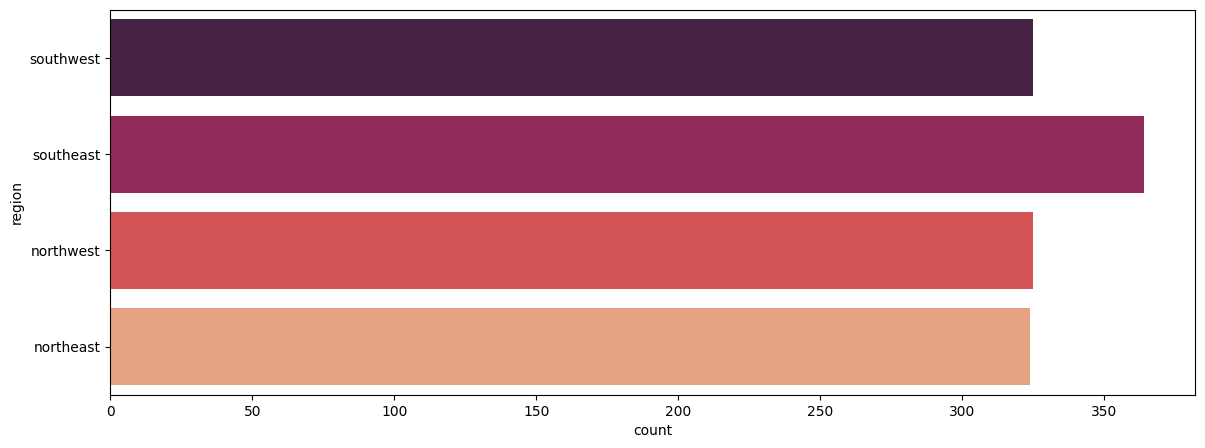

In [16]:
plt.figure(figsize=(14,5))
sns.countplot(y=df['region'],palette='rocket')

# Data Wrangling:
  - cleaning & outliers
  - preparation & tranformation
  

In [17]:
df.drop_duplicates(inplace=True)

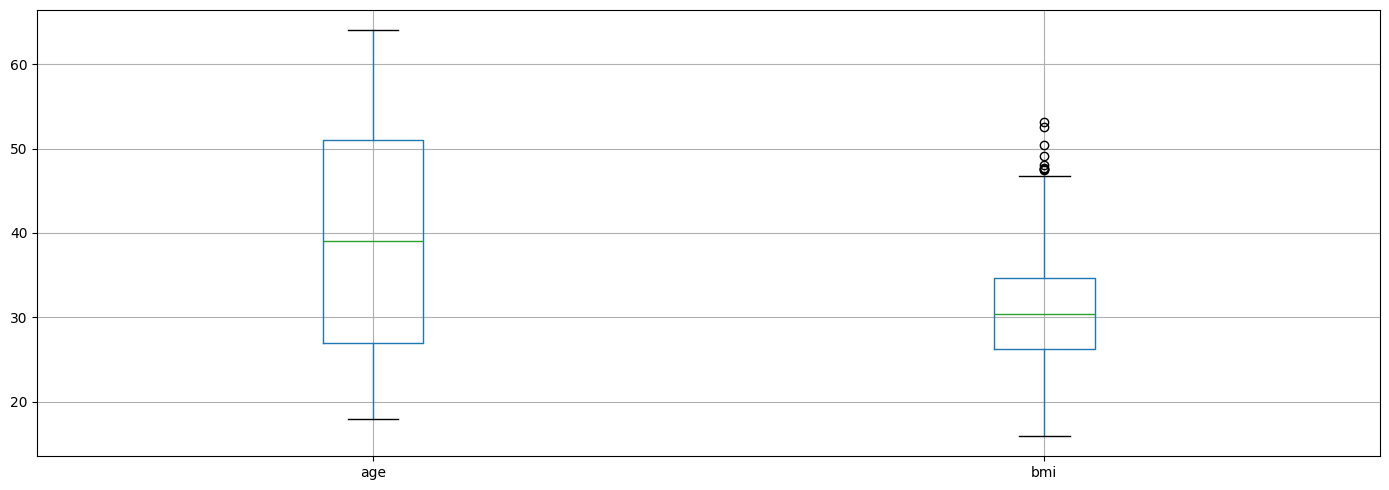

In [18]:
plt.figure(figsize=(14,5))
df.boxplot(column=['age','bmi'])
plt.tight_layout()

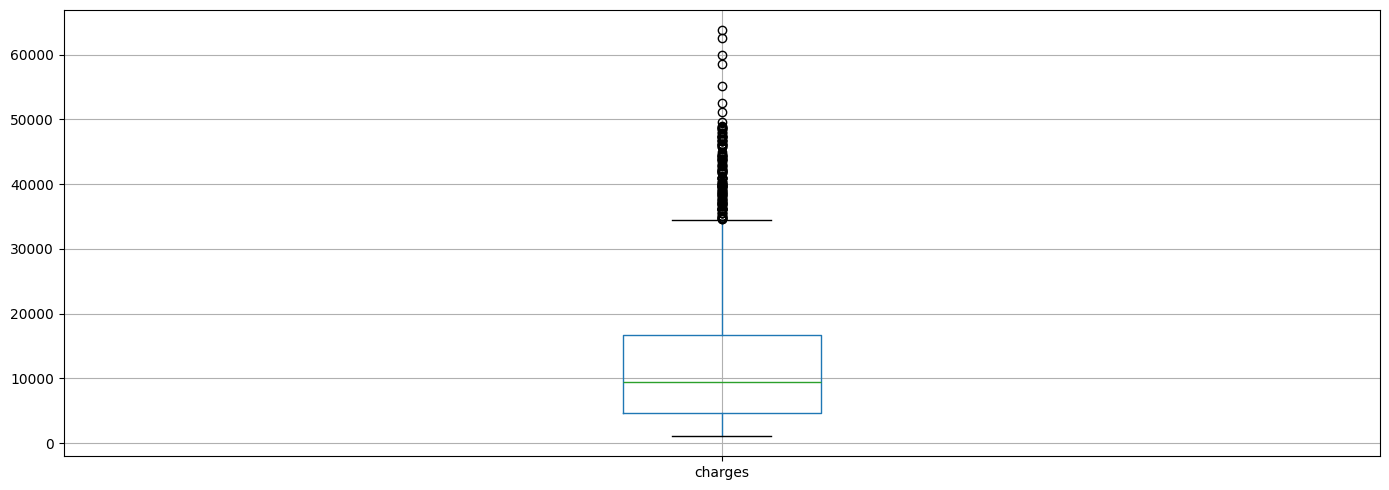

In [19]:
plt.figure(figsize=(14,5))
df.boxplot(column=['charges'])
plt.tight_layout()

In [20]:

df.drop(df.loc[df['bmi']>47].index,inplace=True,axis=0)
df.reset_index(drop=True, inplace=True)


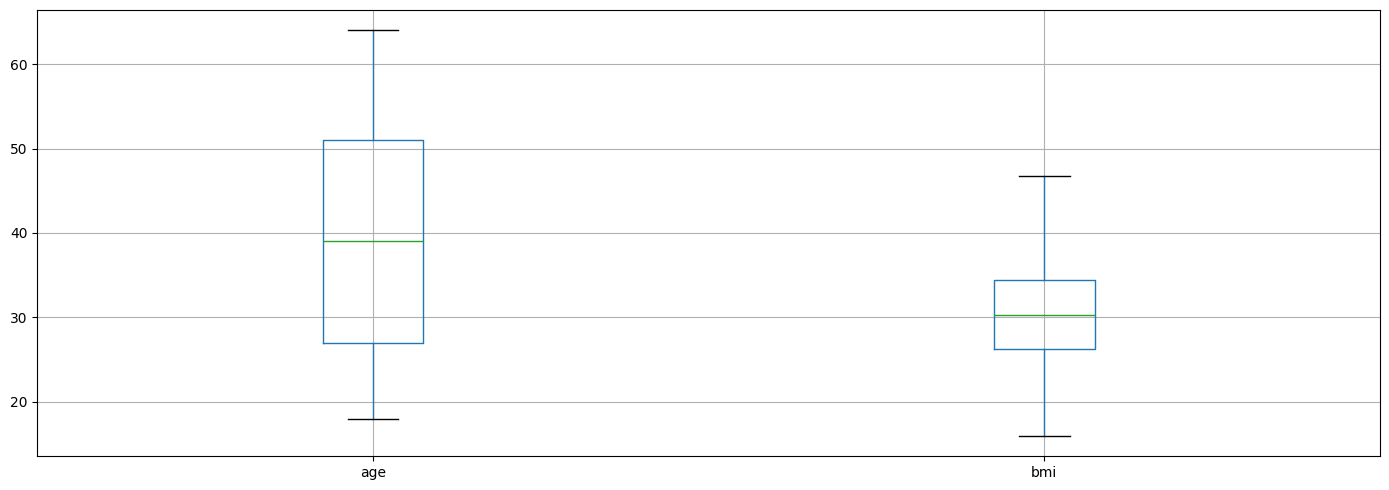

In [21]:
plt.figure(figsize=(14,5))
df.boxplot(column=['age','bmi'])
plt.tight_layout()

In [22]:
df.loc[(df['charges']>50000)&(df['children']==0)]

,age,sex,bmi,children,smoker,region,charges
814,33,female,35.53,0,yes,northwest,55135.40209
1137,60,male,32.80,0,yes,southwest,52590.82939
1291,45,male,30.36,0,yes,southeast,62592.87309


In [23]:
df.drop(df.loc[df['charges']>50000].index,inplace=True,axis=0)
df.reset_index(drop=True, inplace=True)


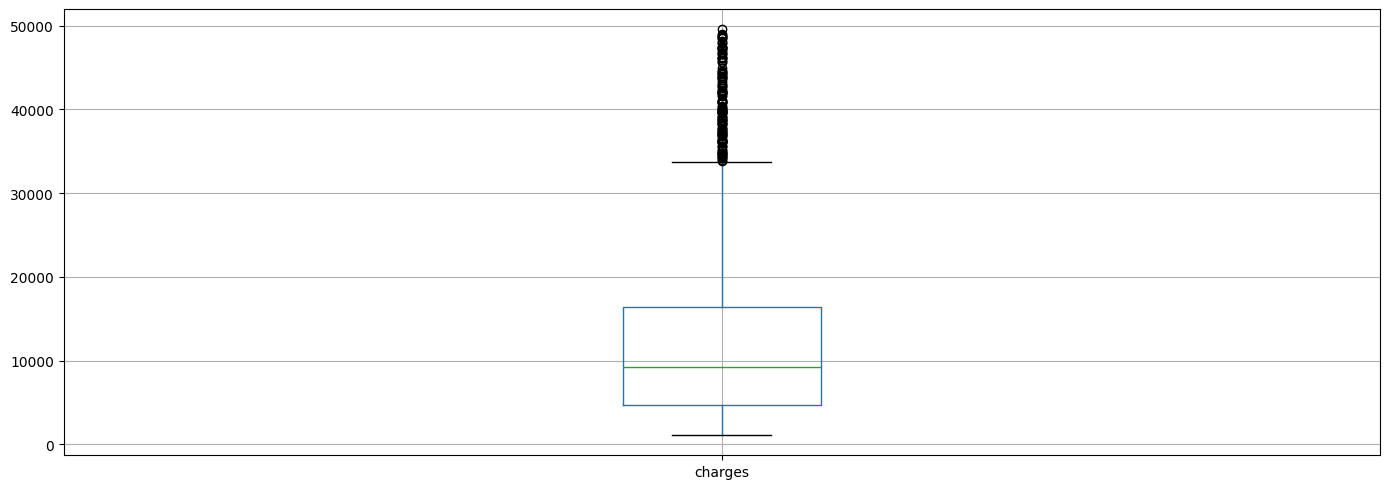

In [24]:
plt.figure(figsize=(14,5))
df.boxplot(column=['charges'])
plt.tight_layout()

In [25]:
enc=LabelEncoder()
df['smoker']=enc.fit_transform(df['smoker'])
df['region']=enc.fit_transform(df['region'])
df['sex']=enc.fit_transform(df['sex'])

In [26]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

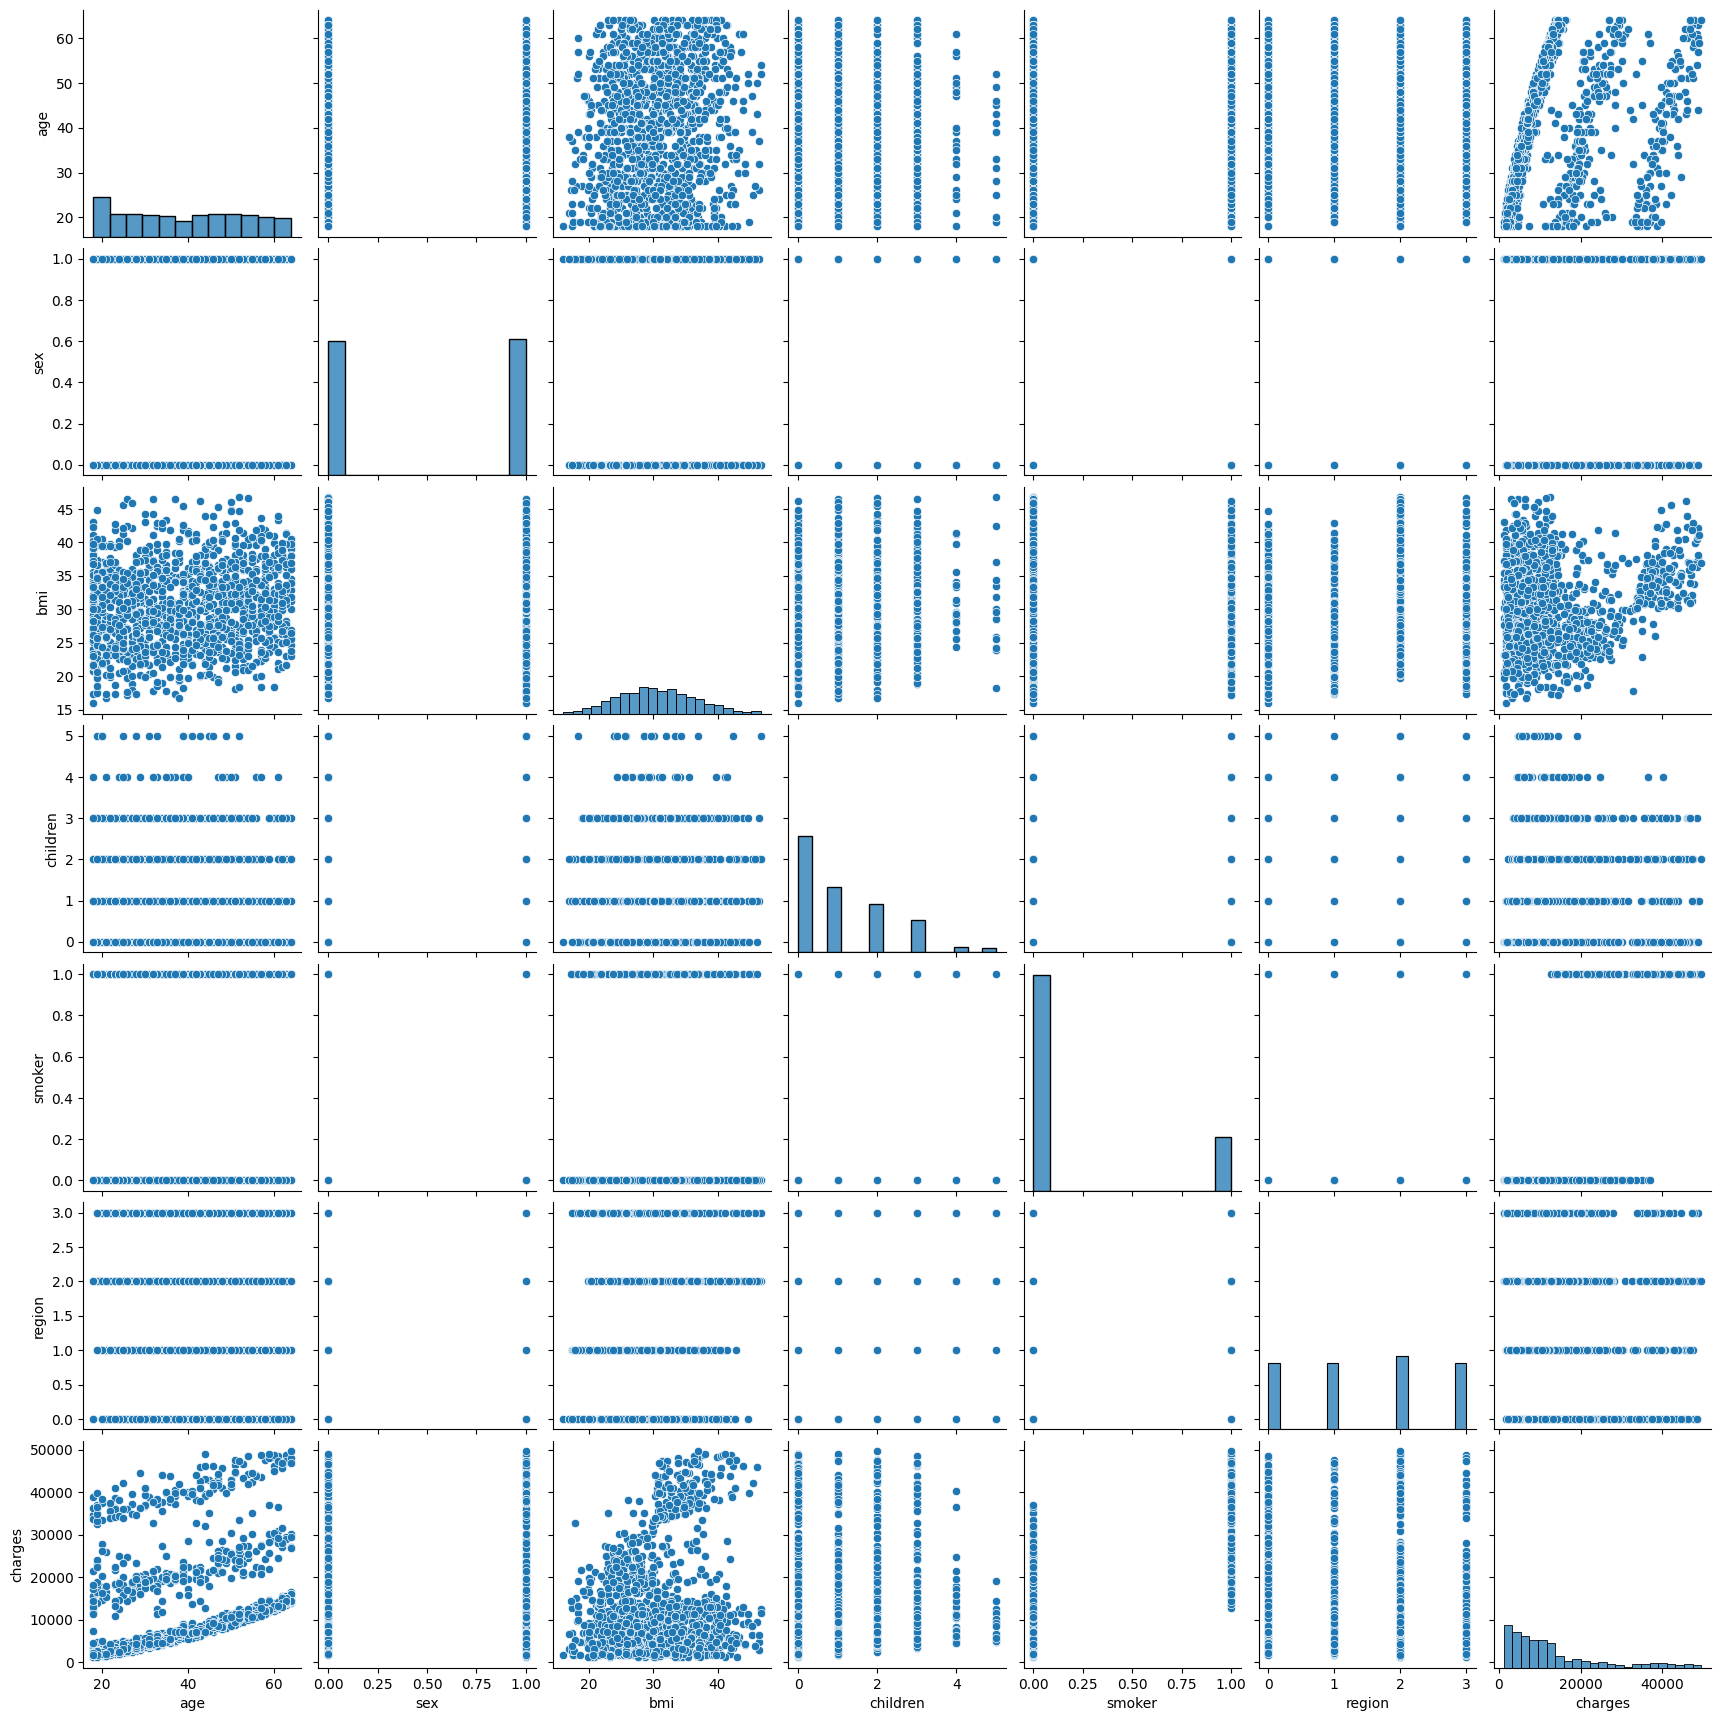

In [27]:
sns.pairplot(df)

## Feature Engineering:
 - Feature Scaling
 - Feature Selection

In [28]:
scaler=MinMaxScaler()

In [29]:
df['age']=scaler.fit_transform(df[['age']])
df['bmi']=scaler.fit_transform(df[['bmi']])
df['charges']=scaler.fit_transform(df[['charges']])

In [30]:
df.corr()['charges']

age         0.308337
sex         0.060835
bmi         0.188208
children    0.074805
smoker      0.784108
region     -0.012911
charges     1.000000
Name: charges, dtype: float64

In [31]:
df.drop(columns=['sex','children','region'],inplace=True)


In [32]:
df.corr()['charges']

age        0.308337
bmi        0.188208
smoker     0.784108
charges    1.000000
Name: charges, dtype: float64

## Modeling:
   - Split data
   - Choose Hyperparameter
   - Train & Test
   - check overfiting
   - Evaluation
   - Deployment
    

In [80]:
X=df[['age','smoker','bmi']].values
y=df['charges'].values

In [81]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [82]:
model = RandomForestRegressor(max_depth=5, n_estimators=150)


In [83]:
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=150)

In [84]:
y_pre=model.predict(x_test)
y_pre_t=model.predict(x_train)

# model Evaluation

In [85]:
cross=cross_val_score(RandomForestRegressor(),X,y)

In [86]:
cross.mean()

np.float64(0.8065121455163997)

In [87]:
r2_score(y_test,y_pre)

0.8527926674719

In [88]:
mean_absolute_error(y_test,y_pre)

0.05133409698920793

# Save model

In [89]:

import joblib
joblib.dump(model, "model.pkl")
print("Model saved successfully!")


Model saved successfully!
